<a href="https://colab.research.google.com/github/aaron-v19/mlprojects/blob/main/Beatrice_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Getting Data

In [49]:
!pip install --upgrade --no-cache-dir rapidsai-csp-utils[cuda11x] rapids cudf cuml

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
ERROR: Could not find a version that satisfies the requirement rapidsai-csp-utils[cuda11x] (from versions: none)
ERROR: No matching distribution found for rapidsai-csp-utils[cuda11x]


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
data=pd.read_csv('/content/drive/MyDrive/Windmill project/Beatrice.csv')

# 2. Initial Exploration

In [53]:
data.head()

,Unnamed: 0,time,u100,v100,fsr,Windspeed,Scaled_Windspeed_(at_90m),Wind_Direction,Power_of_SWT-7.0-154,Turn_off,Power
0,0,01-01-1980 00:00,1.808975,-10.229706,0.000261,10.388420,10.150733,100.028260,378.95800,1,378.95800
1,1,01-01-1980 01:00,1.916092,-10.346832,0.000242,10.522754,10.281994,100.491540,390.87520,1,390.87520
2,2,01-01-1980 02:00,1.940201,-10.212601,0.000230,10.395267,10.157425,100.756920,379.56732,1,379.56732
3,3,01-01-1980 03:00,2.296951,-10.099304,0.000224,10.357217,10.120245,102.813194,376.18005,1,376.18005
4,4,01-01-1980 04:00,2.725143,-10.351501,0.000238,10.704205,10.459293,104.749070,406.82446,1,406.82446


In [54]:
data['Turn_off'].unique()

array([1, 0])

In [55]:
data['Power_of_SWT-7.0-154'].equals(data['Power'])

True

In [56]:
data['Turn_off'].value_counts()

,count
Turn_off,
1,350388
0,252


In [57]:
temp=data[data['Turn_off'] ==0]

In [58]:
temp.head()

,Unnamed: 0,time,u100,v100,fsr,Windspeed,Scaled_Windspeed_(at_90m),Wind_Direction,Power_of_SWT-7.0-154,Turn_off,Power
9696,9696,08-02-1981 00:00,24.442840,7.758560,0.002703,25.644642,25.057580,197.61029,0.0,0,0.0
9697,9697,08-02-1981 01:00,25.764511,7.166122,0.003302,26.742538,26.130264,195.54333,0.0,0,0.0
9698,9698,08-02-1981 02:00,27.219193,4.704437,0.003771,27.622747,26.990255,189.80586,0.0,0,0.0
16628,16628,23-11-1981 20:00,27.740738,-0.763016,0.003337,27.751230,27.115856,178.42447,0.0,0,0.0
16629,16629,23-11-1981 21:00,31.001312,-2.351059,0.003592,31.090334,30.378471,175.66313,0.0,0,0.0


### Initial Cleaning

So we see that there is no power generated when Turn_off=0 and also Power_of_SWT-7.0-154 is same as Power.

Then we can drop following Columns and row without affecting our results
1. Unnamed:0
2. Power_of_SWT-7.0-154
3. Turn_off (After removing rows containing 0 as value)

In [59]:
# Drop Row containg Turn_off value=0
data=data[data['Turn_off'] !=0]

In [60]:
data['Turn_off'].value_counts()

,count
Turn_off,
1,350388


In [61]:
# Drop Columns
cols_to_drop=['Power_of_SWT-7.0-154','Unnamed: 0','Turn_off']
data.drop(columns=cols_to_drop,inplace=True)

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 350388 entries, 0 to 350639
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   time                       350388 non-null  object 
 1   u100                       350388 non-null  float64
 2   v100                       350388 non-null  float64
 3   fsr                        350388 non-null  float64
 4   Windspeed                  350388 non-null  float64
 5   Scaled_Windspeed_(at_90m)  350388 non-null  float64
 6   Wind_Direction             350388 non-null  float64
 7   Power                      350388 non-null  float64
dtypes: float64(7), object(1)
memory usage: 24.1+ MB


Split Time to make 2 more columns month and year

In [63]:
# add columns for year and month
data['time'] = pd.to_datetime(data['time'], format='%d-%m-%Y %H:%M')
print("Updated Information for Location1 DataFrame:")

data['year']=data['time'].dt.year
data['month']=data['time'].dt.month

data.info()

Updated Information for Location1 DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 350388 entries, 0 to 350639
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   time                       350388 non-null  datetime64[ns]
 1   u100                       350388 non-null  float64       
 2   v100                       350388 non-null  float64       
 3   fsr                        350388 non-null  float64       
 4   Windspeed                  350388 non-null  float64       
 5   Scaled_Windspeed_(at_90m)  350388 non-null  float64       
 6   Wind_Direction             350388 non-null  float64       
 7   Power                      350388 non-null  float64       
 8   year                       350388 non-null  int32         
 9   month                      350388 non-null  int32         
dtypes: datetime64[ns](1), float64(7), int32(2)
memory usage: 26.7 MB


In [64]:
# Check for missing values
np.sum(data.isna())

,0
time,0
u100,0
v100,0
fsr,0
Windspeed,0
Scaled_Windspeed_(at_90m),0
Wind_Direction,0
Power,0
year,0
month,0


###Data Overview

In [65]:
data.describe()

,time,u100,v100,fsr,Windspeed,Scaled_Windspeed_(at_90m),Wind_Direction,Power,year,month
count,350388,350388.000000,350388.000000,350388.000000,350388.000000,350388.000000,350388.000000,350388.000000,350388.000000,350388.000000
mean,1999-12-31 23:51:00.073974784,1.856957,2.020694,0.000271,9.540962,9.322657,202.549331,299.360497,1999.498964,6.523534
min,1980-01-01 00:00:00,-25.000610,-25.087570,0.000025,0.019537,0.019090,0.002441,0.000000,1980.000000,1.000000
25%,1989-12-30 23:45:00,-3.104851,-3.232986,0.000049,6.214490,6.072309,134.131012,78.832396,1989.000000,4.000000
50%,2000-01-01 00:30:00,1.937866,2.555687,0.000123,9.339544,9.125860,211.030885,285.906600,2000.000000,7.000000
75%,2009-12-31 17:15:00,6.908039,7.513714,0.000319,12.528948,12.242278,277.410483,542.975735,2009.000000,10.000000
max,2019-12-31 23:00:00,25.468582,24.993301,0.006824,25.569935,24.984484,359.999820,588.000000,2019.000000,12.000000
std,NaN,6.943195,7.429170,0.000381,4.461148,4.359054,88.733223,221.213980,11.543884,3.447482


### Box plots for Numeric data

In [66]:
numeric_data=data.select_dtypes(include=np.number)

In [67]:
numeric_data.head()

,u100,v100,fsr,Windspeed,Scaled_Windspeed_(at_90m),Wind_Direction,Power,year,month
0,1.808975,-10.229706,0.000261,10.388420,10.150733,100.028260,378.95800,1980,1
1,1.916092,-10.346832,0.000242,10.522754,10.281994,100.491540,390.87520,1980,1
2,1.940201,-10.212601,0.000230,10.395267,10.157425,100.756920,379.56732,1980,1
3,2.296951,-10.099304,0.000224,10.357217,10.120245,102.813194,376.18005,1980,1
4,2.725143,-10.351501,0.000238,10.704205,10.459293,104.749070,406.82446,1980,1


In [68]:
numeric_data=numeric_data.drop(columns=['year','month'])

In [69]:
numeric_data

,u100,v100,fsr,Windspeed,Scaled_Windspeed_(at_90m),Wind_Direction,Power
0,1.808975,-10.229706,0.000261,10.388420,10.150733,100.028260,378.95800
1,1.916092,-10.346832,0.000242,10.522754,10.281994,100.491540,390.87520
2,1.940201,-10.212601,0.000230,10.395267,10.157425,100.756920,379.56732
3,2.296951,-10.099304,0.000224,10.357217,10.120245,102.813194,376.18005
4,2.725143,-10.351501,0.000238,10.704205,10.459293,104.749070,406.82446
...,...,...,...,...,...,...,...
350635,5.339706,5.910355,0.000109,7.965221,7.782983,227.903780,176.63489
350636,5.571014,5.264069,0.000092,7.664634,7.489274,223.377300,156.59825
350637,5.881805,5.061096,0.000089,7.759531,7.582000,220.710890,162.77127
350638,5.934189,4.434921,0.000077,7.408314,7.238819,216.772630,140.61679


In [70]:
numeric_data.columns

Index(['u100', 'v100', 'fsr', 'Windspeed', 'Scaled_Windspeed_(at_90m)',
       'Wind_Direction', 'Power'],
      dtype='object')

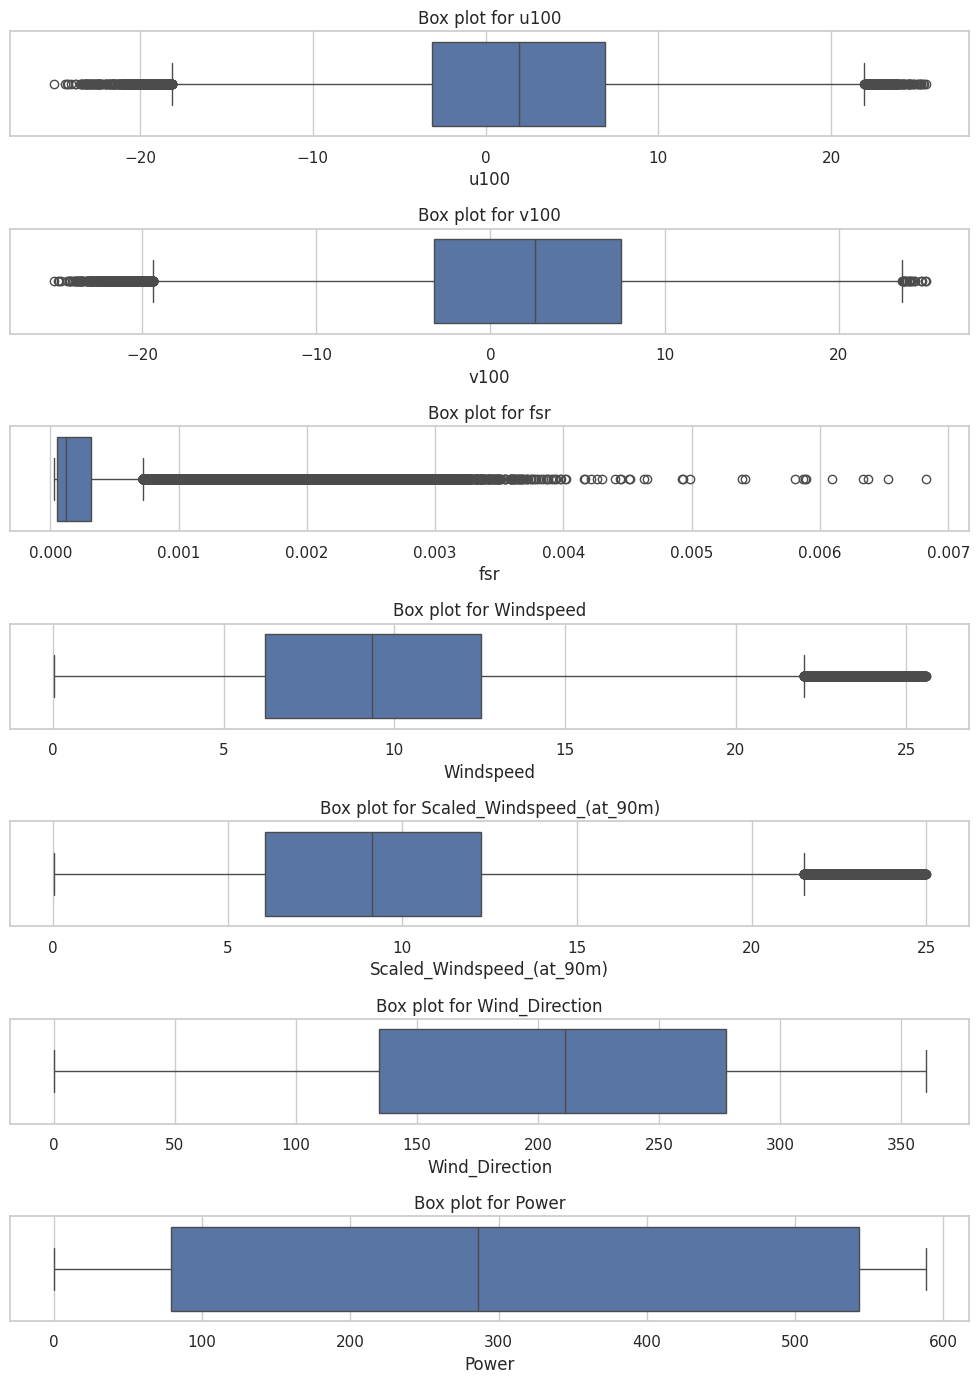

In [71]:
# Set the style of seaborn
sns.set(style="whitegrid")
# Create subplots for numeric columns
fig, axes = plt.subplots(nrows=len(numeric_data.columns), ncols=1, figsize=(10, 2*len(numeric_data.columns)))
# Create box plots for numeric columns
for i, column in enumerate(numeric_data.columns):
    sns.boxplot(x=numeric_data[column], ax=axes[i], orient='h')
    axes[i].set_title(f'Box plot for {column}')
# Adjust layout for numeric columns
plt.tight_layout()
plt.show()

Including Outliers in dataset trusting the measuring equipment

Only remove if prediction problems are detected

# Visualization of Data

### KDE plots

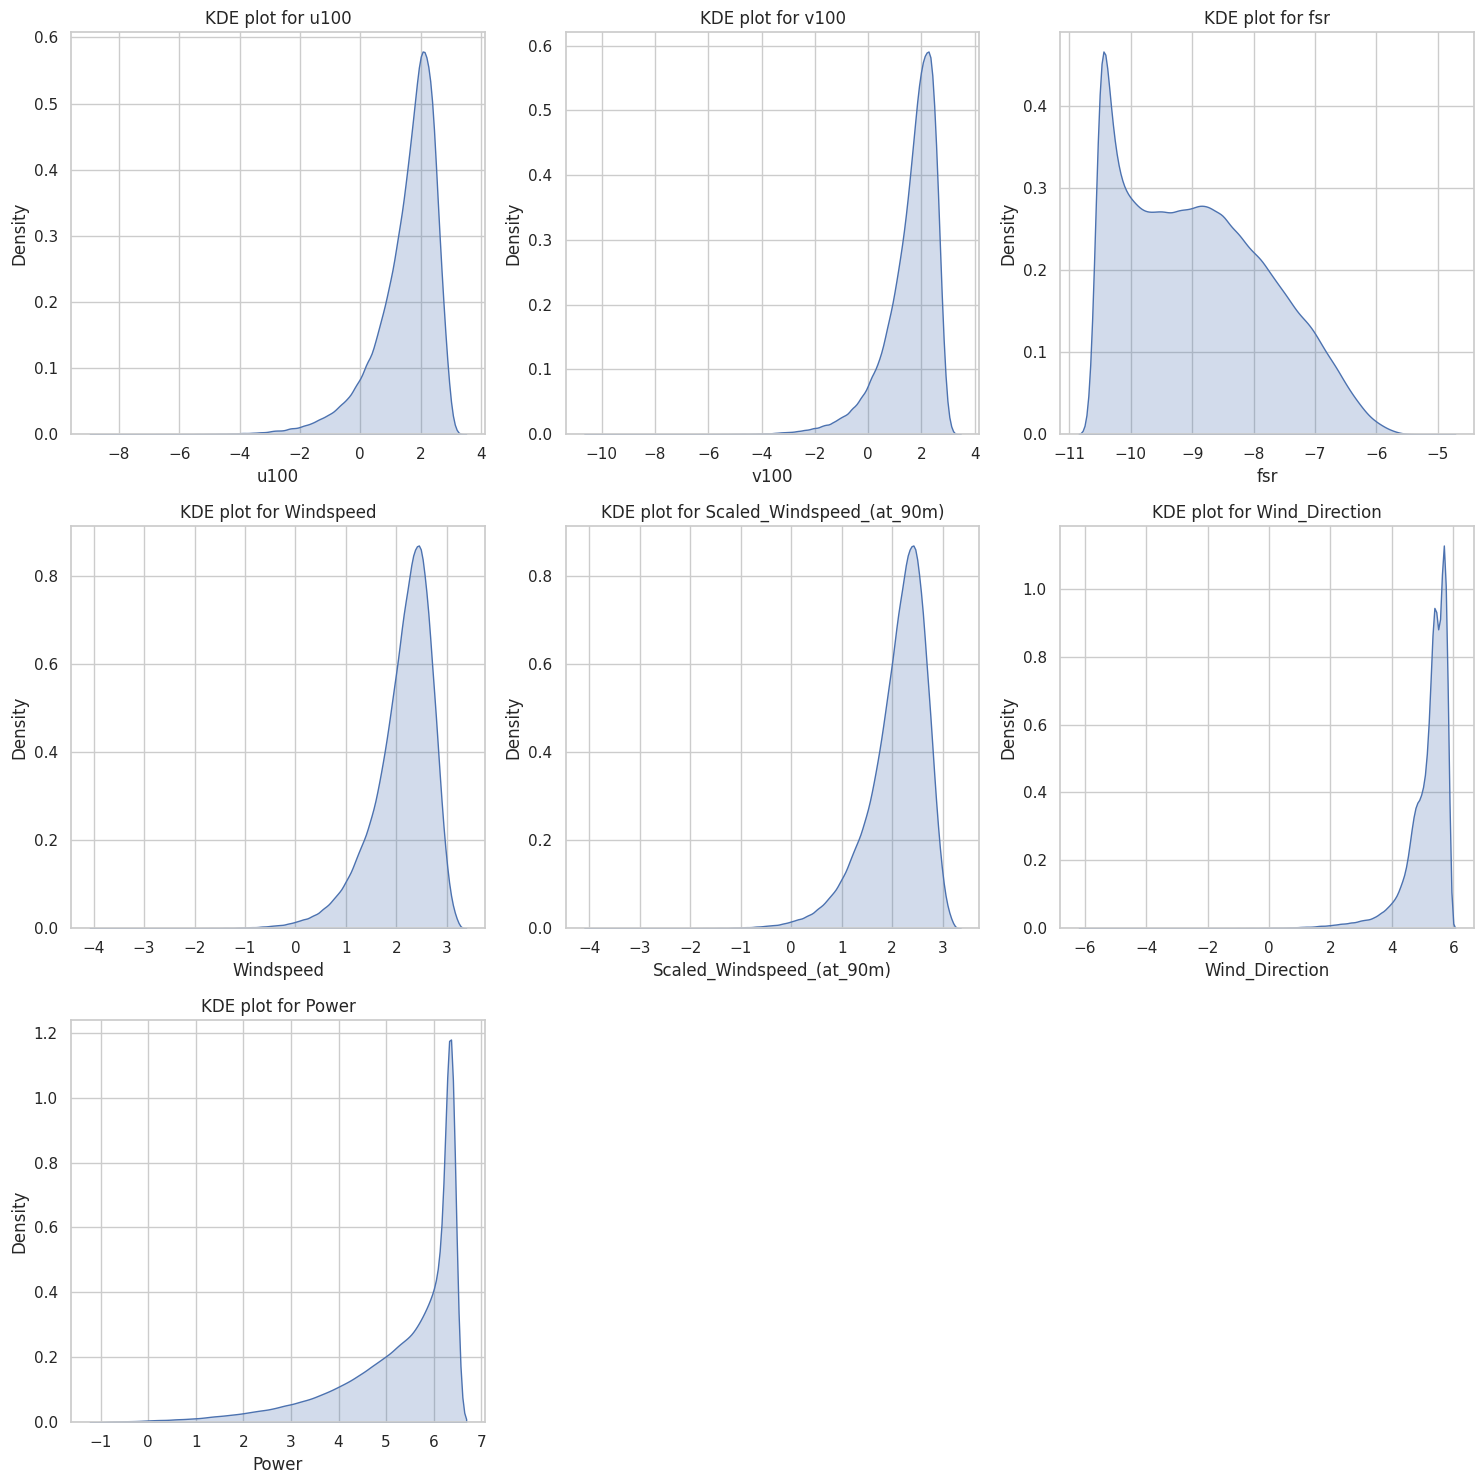

In [72]:
# Select numeric columns for KDE plots, excluding 'year' and 'month' as they are categorical
numeric_cols = data.select_dtypes(include=np.number).drop(columns=['year', 'month']).columns

# Create subplots for KDE plots
num_cols = len(numeric_cols)
num_rows = (num_cols + 2) // 3  # Calculate rows needed to accommodate 3 columns per row
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))

# Flatten axes for easier iteration
axes = axes.ravel()

# Create KDE plots for each numeric column
for i, col in enumerate(numeric_cols):
    try:
      sns.kdeplot(np.log(data[col]), ax=axes[i], fill=True)
      axes[i].set_title(f'KDE plot for {col}')
    except ValueError: # Handle potential errors for non-positive values
      print(f"Skipping KDE plot for {col}: Non-positive values encountered")
      axes[i].set_title(f'KDE plot for {col} (Skipped)')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

###Histograms

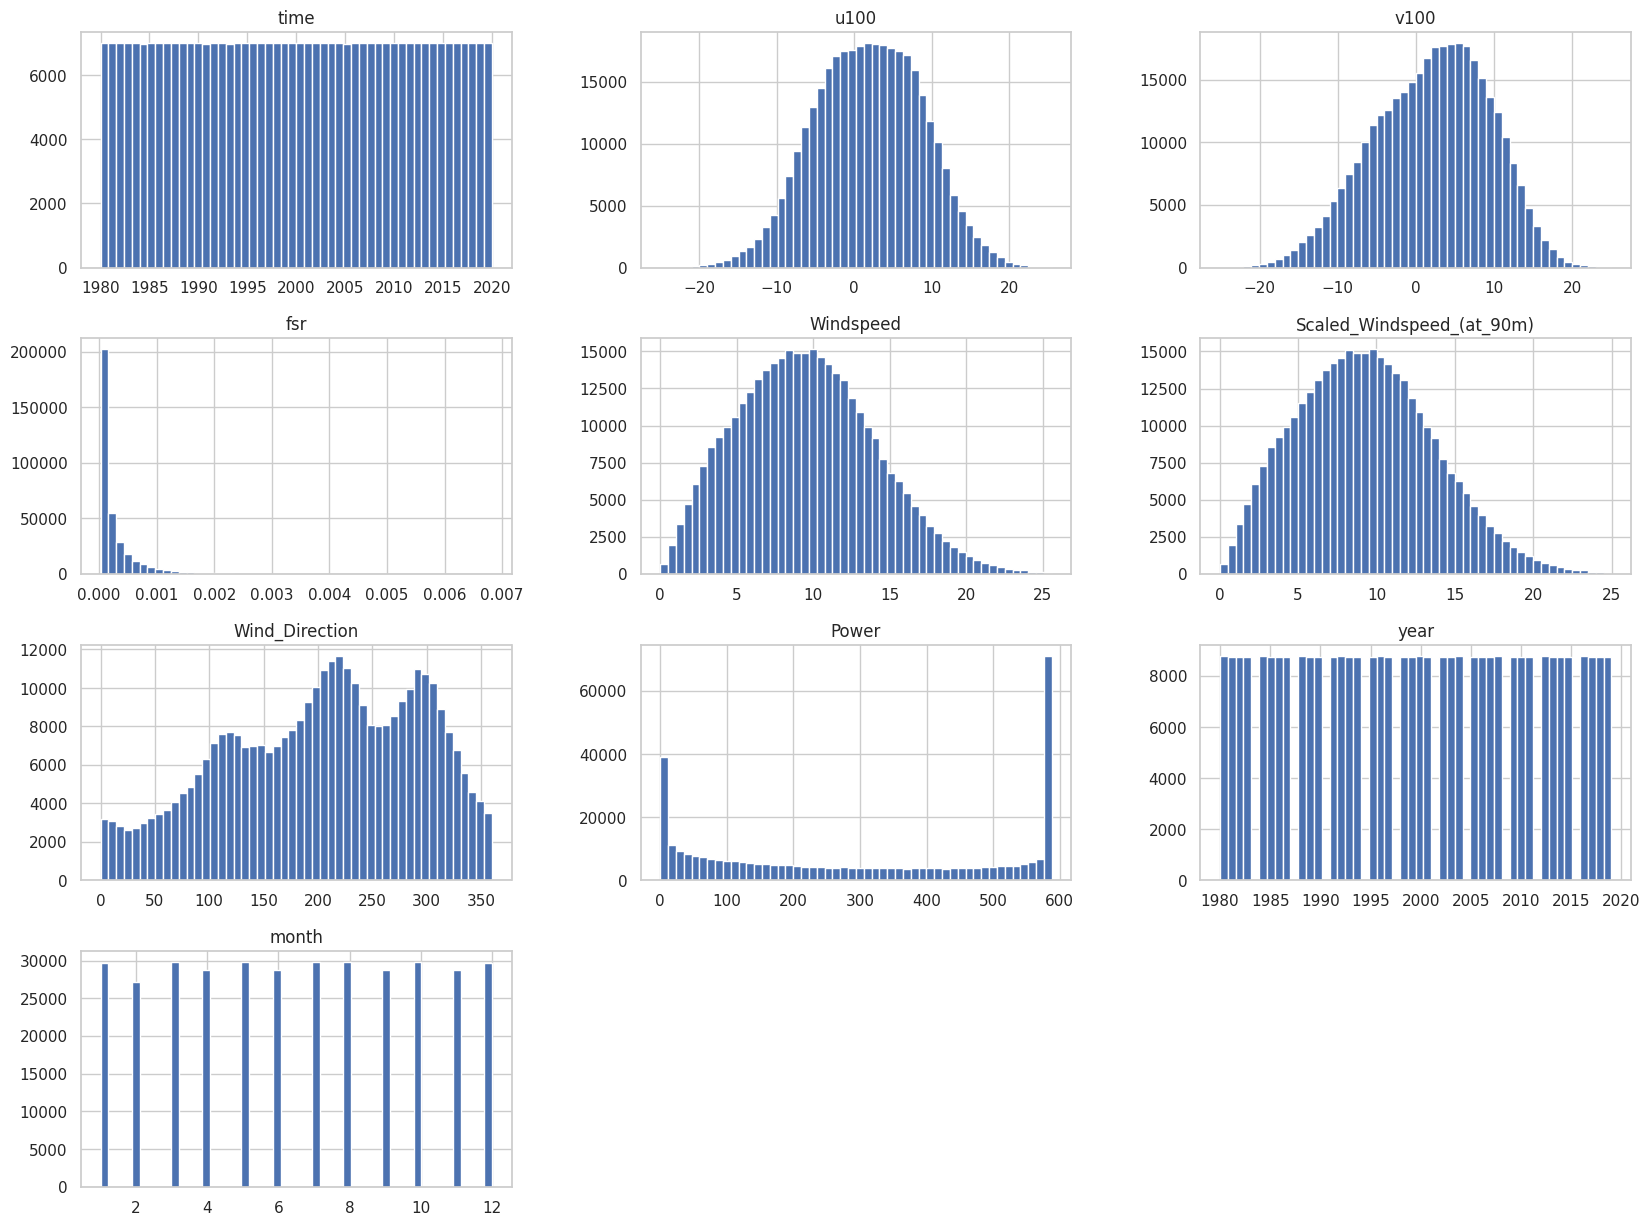

In [73]:
data.hist(bins=50, figsize=(20,15))
plt.show()

###Line plots

Take small sample of population (frac=0.1) to decrease graph density

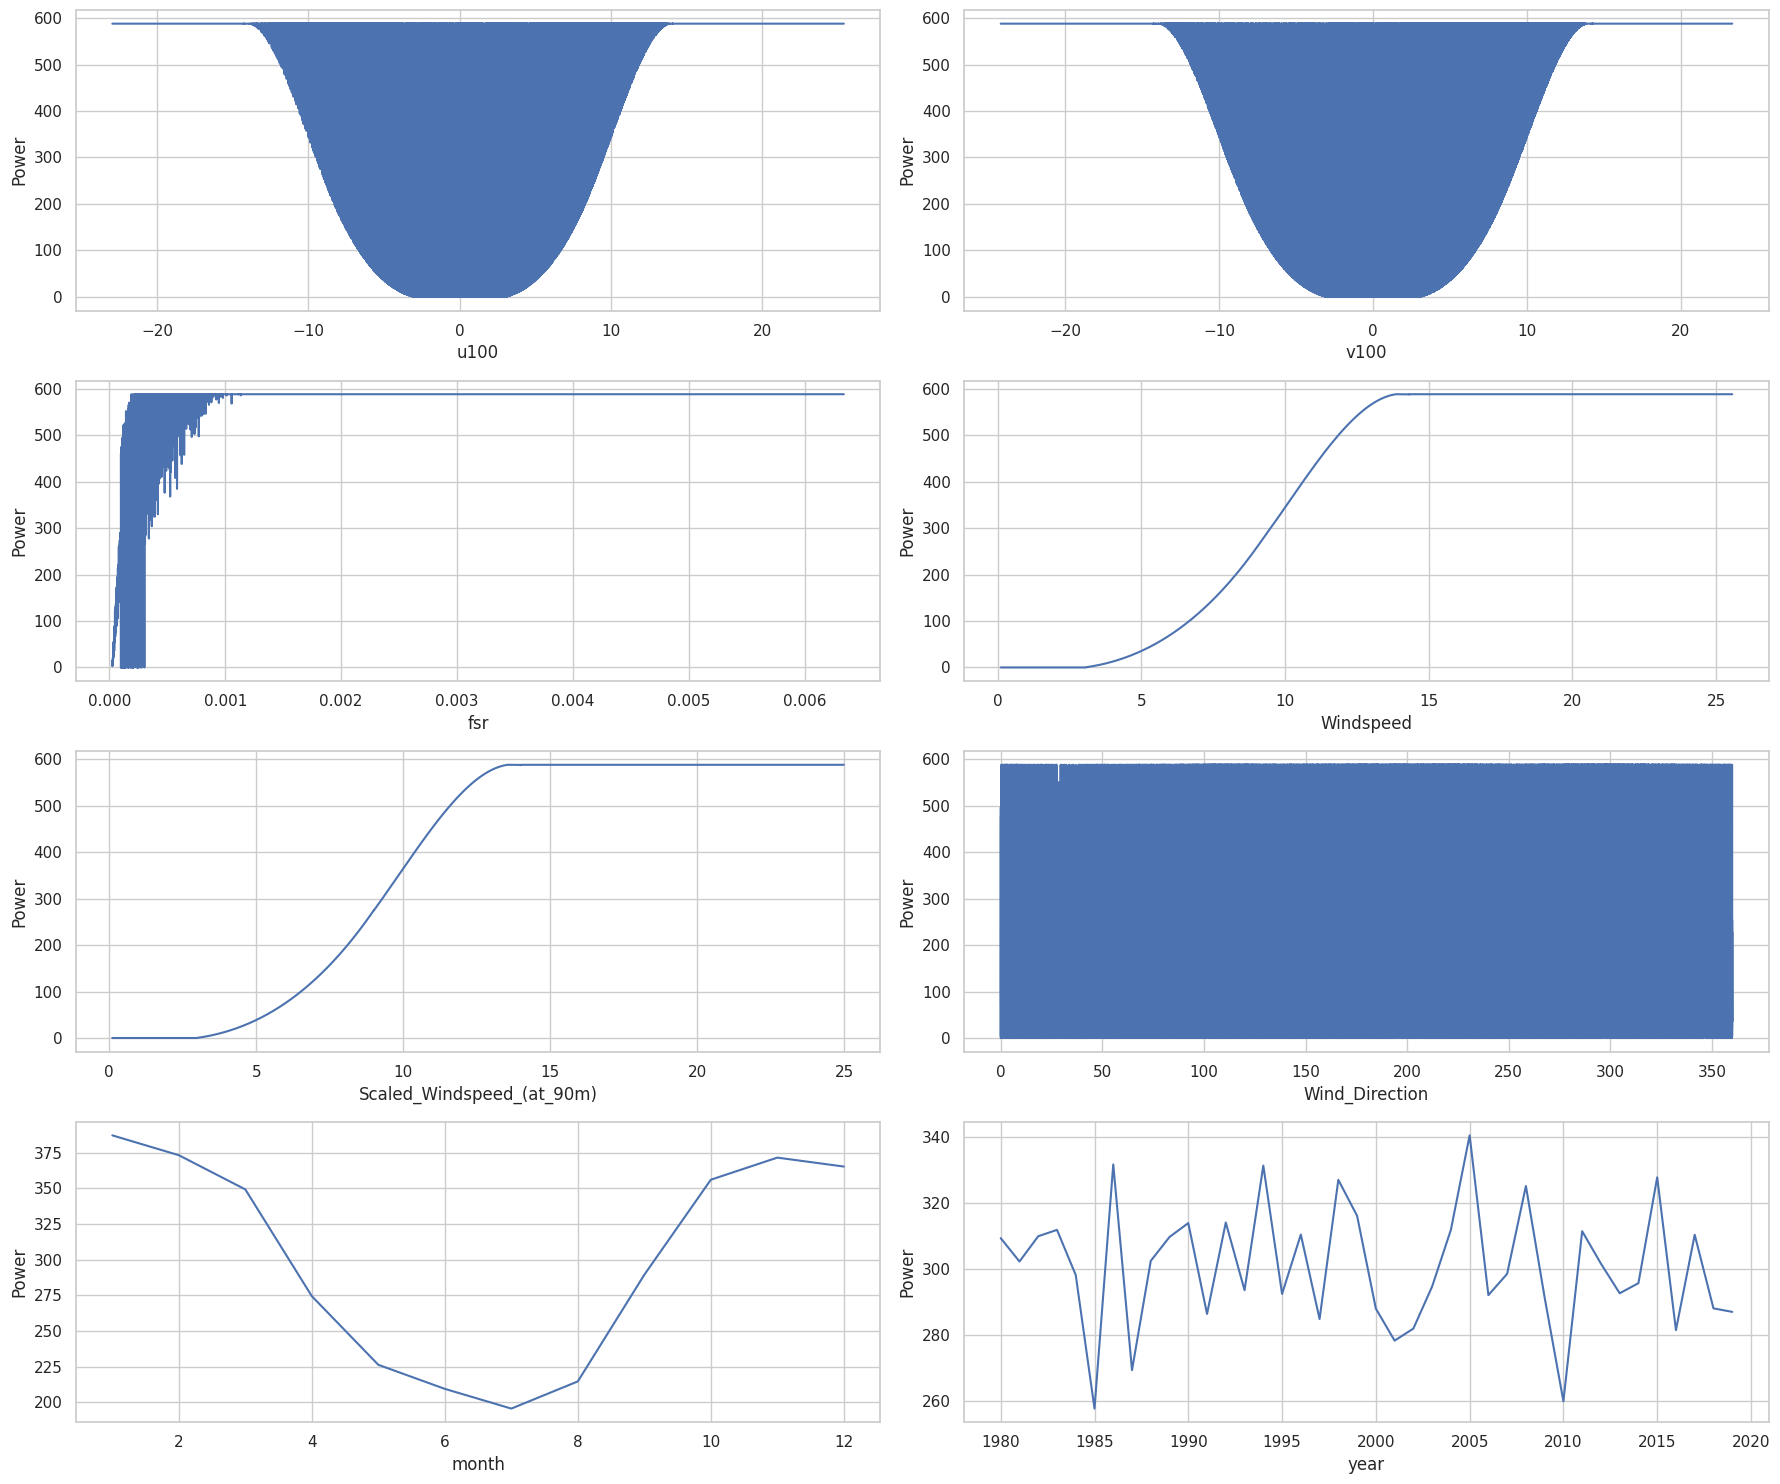

In [74]:
temp_df=data[data.columns[data.columns!='time']].sample(frac=0.1)
fig, axes = plt.subplots(4, 2, figsize=(18, 15))

sns.lineplot(data=temp_df, y="Power", x="u100", ax=axes[0, 0], ci=None).set(xlabel='u100', ylabel='Power')
sns.lineplot(data=temp_df, y="Power", x="v100", ax=axes[0, 1], ci=None).set(xlabel='v100', ylabel='Power')
sns.lineplot(data=temp_df, y="Power", x="fsr", ax=axes[1, 0], ci=None).set(xlabel='fsr', ylabel='Power')
sns.lineplot(data=temp_df, y="Power", x="Windspeed", ax=axes[1, 1], ci=None).set(xlabel='Windspeed', ylabel='Power')
sns.lineplot(data=temp_df, y="Power", x="Scaled_Windspeed_(at_90m)", ax=axes[2, 0], ci=None).set(xlabel='Scaled_Windspeed_(at_90m)', ylabel='Power')
sns.lineplot(data=temp_df, y="Power", x="Wind_Direction", ax=axes[2, 1], ci=None).set(xlabel='Wind_Direction', ylabel='Power')
sns.lineplot(data=temp_df, y="Power", x="year", ax=axes[3, 1], ci=None).set(xlabel='year', ylabel='Power')
sns.lineplot(data=temp_df, y="Power", x="month", ax=axes[3, 0], ci=None).set(xlabel='month', ylabel='Power')

plt.tight_layout()
plt.show()

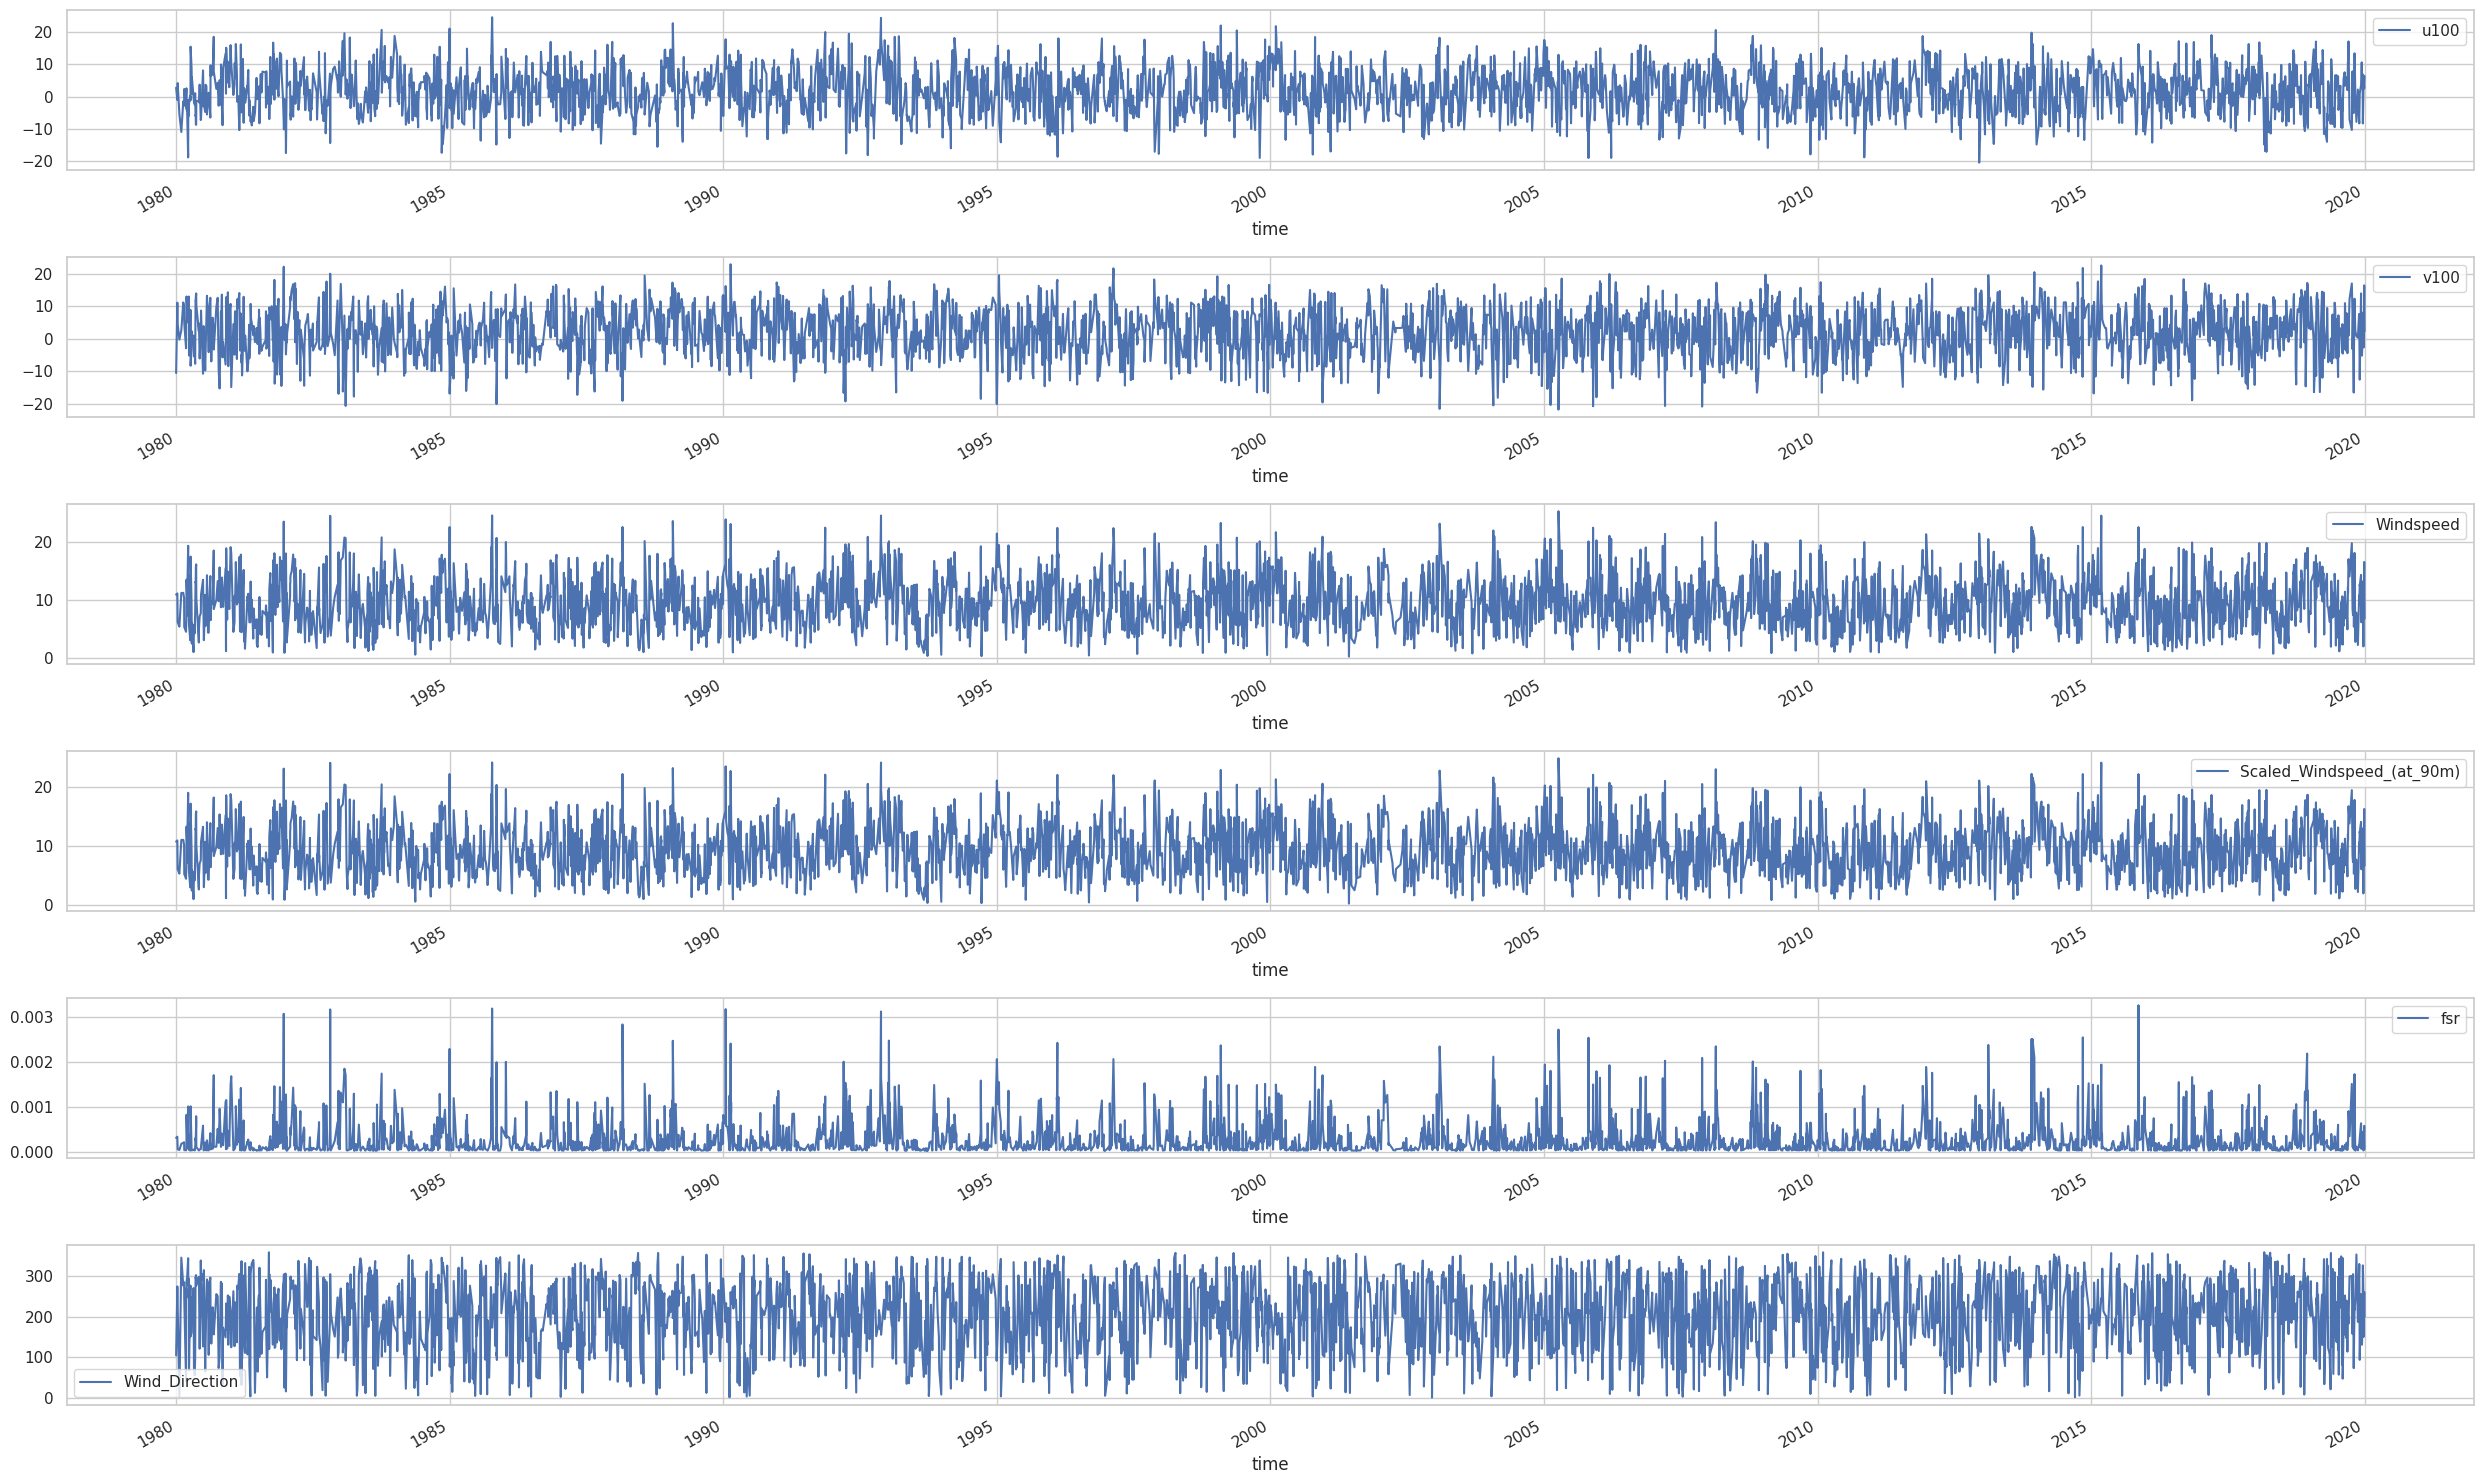

In [75]:
time_data=data.sample(frac=0.01)
time_data.sort_values(by=['time'],inplace=True)
fig, axes = plt.subplots(6,1, figsize=(25, 15))
time_data.plot('time','u100',ax=axes[0])
time_data.plot('time','v100',ax=axes[1])
time_data.plot('time','Windspeed',ax=axes[2])
time_data.plot('time','Scaled_Windspeed_(at_90m)',ax=axes[3])
time_data.plot('time','fsr',ax=axes[4])
time_data.plot('time','Wind_Direction',ax=axes[5])
plt.tight_layout()
plt.show()

We are taking a smaller sample of wind direction to see any trends  

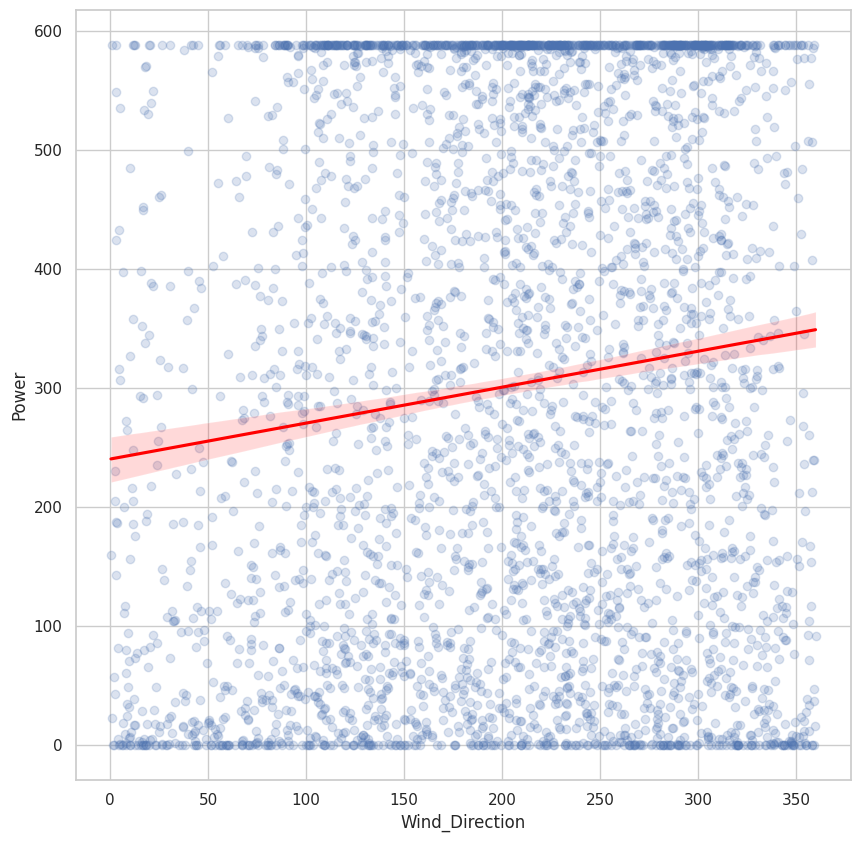

In [76]:

direction_data=data[['Wind_Direction','Power']].sample(frac=0.01)

sns.regplot(data=direction_data, y="Power", x="Wind_Direction", scatter_kws={'alpha':0.2}, line_kws={'color':'red'}).set(xlabel='Wind_Direction', ylabel='Power')
plt.show()

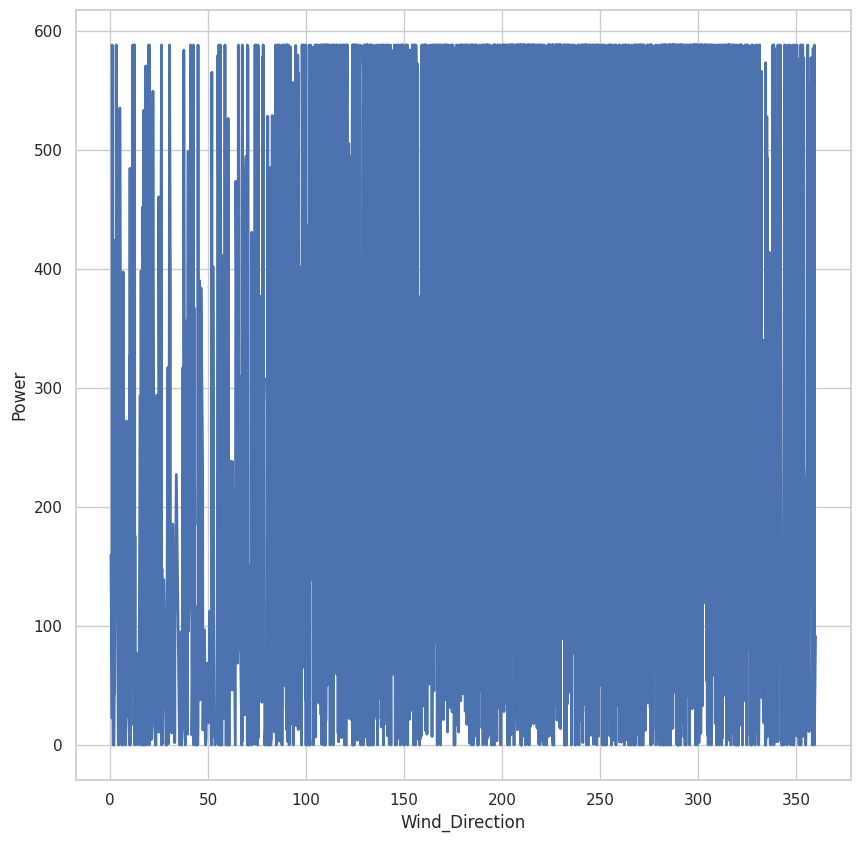

In [77]:
sns.lineplot(data=direction_data, y="Power", x="Wind_Direction", ci=None, estimator='mean', lw=2).set(xlabel='Wind_Direction', ylabel='Power')
plt.show()

<Axes: xlabel='year'>

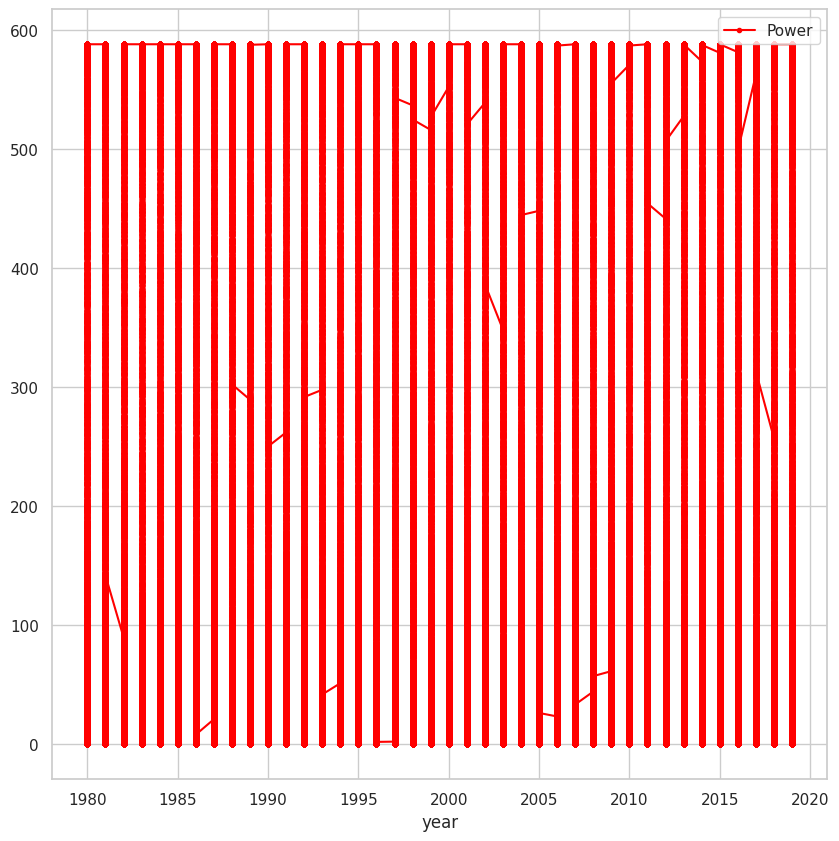

In [78]:
data.plot('year','Power',color='red',marker='.')

# Correlation Between columns

In [79]:
corr_table = round(data[data.columns].corr(method = 'pearson'), 2)
corr_table

,time,u100,v100,fsr,Windspeed,Scaled_Windspeed_(at_90m),Wind_Direction,Power,year,month
time,1.00,-0.01,0.02,-0.01,-0.01,-0.01,0.01,-0.01,1.00,0.02
u100,-0.01,1.00,-0.15,0.18,0.16,0.16,-0.23,0.16,-0.01,0.01
v100,0.02,-0.15,1.00,0.14,0.20,0.20,0.73,0.21,0.02,-0.00
fsr,-0.01,0.18,0.14,1.00,0.80,0.80,0.05,0.67,-0.01,-0.01
Windspeed,-0.01,0.16,0.20,0.80,1.00,1.00,0.12,0.95,-0.01,-0.02
Scaled_Windspeed_(at_90m),-0.01,0.16,0.20,0.80,1.00,1.00,0.12,0.95,-0.01,-0.02
Wind_Direction,0.01,-0.23,0.73,0.05,0.12,0.12,1.00,0.13,0.01,0.01
Power,-0.01,0.16,0.21,0.67,0.95,0.95,0.13,1.00,-0.01,-0.01
year,1.00,-0.01,0.02,-0.01,-0.01,-0.01,0.01,-0.01,1.00,-0.00
month,0.02,0.01,-0.00,-0.01,-0.02,-0.02,0.01,-0.01,-0.00,1.00


<Axes: >

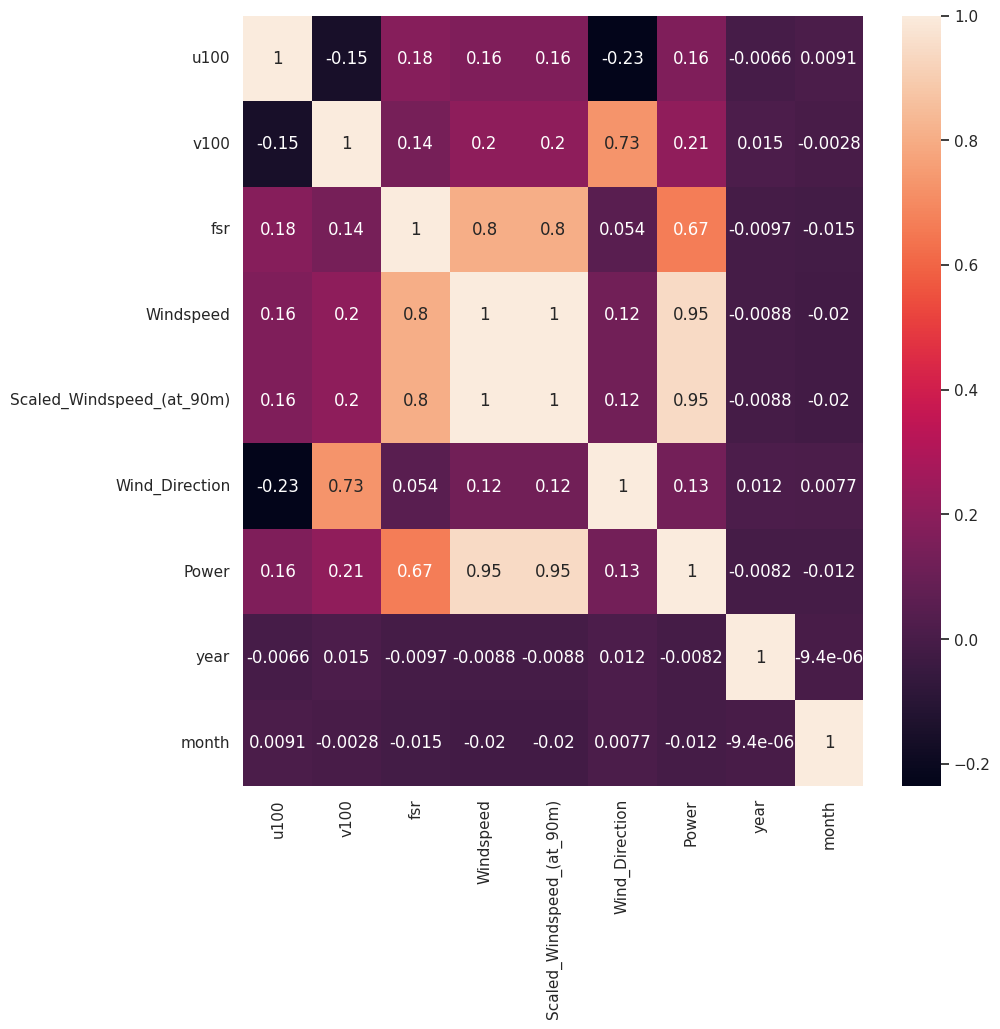

In [80]:
# HEATMAP FOR VIZUAL CORRELATION
sns.set(rc={"figure.figsize": (10,10)})
sns.heatmap(data.corr(numeric_only=True),annot=True)

# Models

##1) Linear Regression

In [81]:
### MULTIVARIATE/LINEAR REGRESSION ###
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [82]:
features=data.drop(columns=['Power','time'])
target=data['Power']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)
model = LinearRegression(n_jobs=10)
model.fit(X_train, y_train)

LinearRegression(n_jobs=10)

Model Metrics

In [84]:
print('R square:', model.score(X_test, y_test))
print('Coefficient: ', model.coef_)
print('Intercept: ', model.intercept_)

R square: 0.9483745188871686
Coefficient:  [ 3.00459437e-01  5.30183407e-01  5.20536232e+05 -6.15693698e+06
  6.30114973e+06 -6.14258914e-03  7.68476636e-03  7.26337976e-02]
Intercept:  -214.59097235975378


This is a good R square value so we will take it as is

In [85]:
prediction = model.predict(X_test)

In [86]:
pred_df = pd.DataFrame({"Value": y_test, "Pred": prediction})
pred_df.head()

,Value,Pred
303606,513.240230,454.196459
139652,499.808470,425.890442
206863,17.476282,22.949184
12942,39.384235,71.076187
252877,82.096466,135.310200


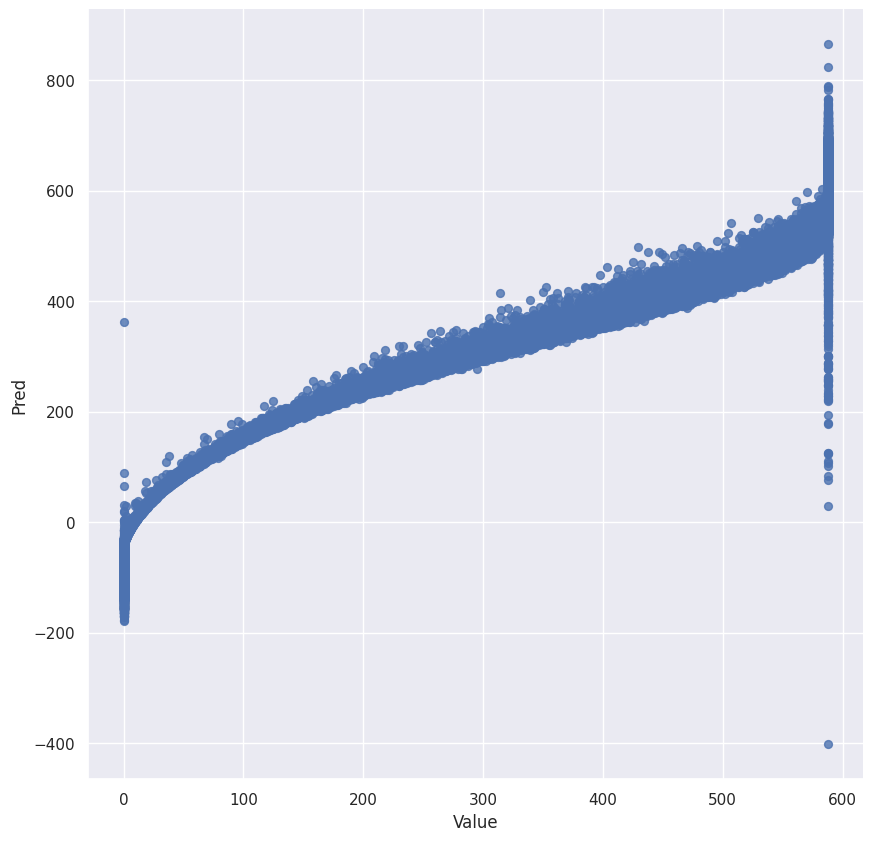

In [87]:
# Value vs Pred

from matplotlib import pyplot as plt
pred_df.plot(kind='scatter', x='Value', y='Pred', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [88]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, prediction)
mse

2535.499229300014

### Trying Kfold Method to keep overfittiing in check

In [89]:
from sklearn.model_selection import KFold

In [90]:
X = features
y = target
#Split dataset into 10 consecutive folds
kf = KFold(n_splits=10, shuffle=True)
model = LinearRegression()
results = []
counter = 0

In [91]:
for train_index, test_index in kf.split(X):
    counter = counter + 1
    X_train, y_train = X.values[train_index], y.values[train_index]
    X_test, y_test = X.values[test_index], y.values[test_index]
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    mse = mean_squared_error(y_test, prediction)
    print(counter,":",mse)
    results.append(mse)

1 : 2569.9730313366754
2 : 2568.8463047942214
3 : 2623.413092928956
4 : 2563.8916256178873
5 : 2575.581053618701
6 : 2602.823034378773
7 : 2526.2515469713658
8 : 2529.8931839638276
9 : 2519.423955772582
10 : 2570.562233773837


In [92]:
avg_mse = np.mean(results)
print("AVERAGE MSE:", avg_mse)

AVERAGE MSE: 2565.0659063156827


Cross validation

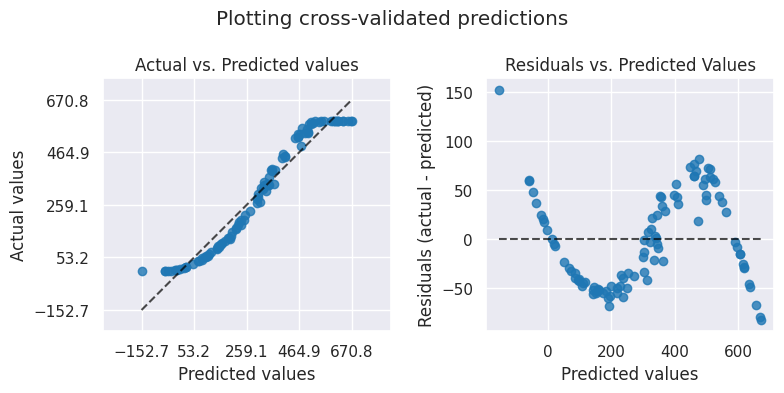

In [93]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(model, X, y, cv=10)
import matplotlib.pyplot as plt

from sklearn.metrics import PredictionErrorDisplay

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()

## 2) Random Forest

In [94]:
X=data.drop(columns=['Power','time'])
y=data['Power']

In [95]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=40)
model2 = RandomForestRegressor()
model2.fit(X_train,y_train)
pred2 = model2.predict(X_test)

In [96]:
from sklearn.metrics import accuracy_score
accuracy2 = model2.score(X_train,y_train)
accuracy2

0.9999999999775162

In [97]:
pred_df = pd.DataFrame({"Value": y_test, "Pred": pred2})

In [98]:
pred_df.head()

,Value,Pred
283479,5.103046,5.103460
315135,9.958982,9.958541
18609,269.647580,269.646756
142849,331.154140,331.149789
243765,414.699800,414.702577


In [99]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred2)
mse

4.534275412531852e-06

## 3) Lasso Model

In [101]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=40)

In [102]:
model3 = Lasso()
model3.fit(X_train,y_train)
pred3 = model3.predict(X_test)

In [103]:
accuracy3 = model3.score(X_train,y_train)
accuracy3

0.8943154540951058

In [104]:
pred_df = pd.DataFrame({"Value": y_test, "Pred": pred3})
pred_df.head()

,Value,Pred
283479,5.103046,15.345058
315135,9.958982,37.161009
18609,269.647580,283.480956
142849,331.154140,318.367777
243765,414.699800,363.849748


In [105]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred3)
mse

5127.513621391637

### Cross Validation

In [106]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

mean_squared_metrics = make_scorer(mean_squared_error,greater_is_better=True)
mean_error  =cross_val_score(model3,X,y ,cv=10,scoring=mean_squared_metrics)

mean_error

array([5314.13311583, 4827.28138617, 5324.66003539, 5490.81412537,
       5280.639338  , 4827.19053898, 5122.6107184 , 5126.93921685,
       5361.09234772, 5000.28272962])

In [107]:
np.mean(mean_error)

5167.564355232607

Cross val visualization

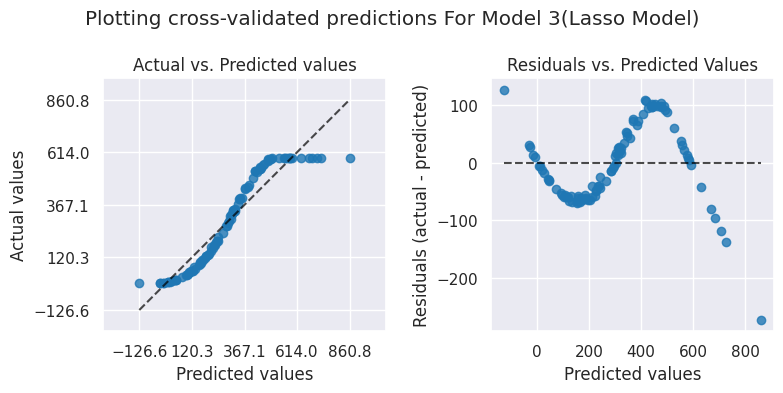

In [108]:
import matplotlib.pyplot as plt
from sklearn.metrics import PredictionErrorDisplay
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(model3, X, y, cv=10)

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions For Model 3(Lasso Model)")
plt.tight_layout()
plt.show()

## Trailing Twelve Months(TTM) for the Power

In [109]:
data.sort_values(by=['time'], inplace=True)
ttm_data = data.copy()
ttm_data['TTM_Power'] = ttm_data['Power'].rolling(window=12, min_periods=12).sum()


In [110]:

# Optional: Remove the first 11 months
ttm_data = ttm_data[11:]


In [111]:

print(ttm_data[['time', 'Power', 'TTM_Power']].head(15))

                  time      Power   TTM_Power
11 1980-01-01 11:00:00  456.14950  5184.46414
12 1980-01-01 12:00:00  438.10342  5243.60956
13 1980-01-01 13:00:00  470.16160  5322.89596
14 1980-01-01 14:00:00  449.20285  5392.53149
15 1980-01-01 15:00:00  445.51376  5461.86520
16 1980-01-01 16:00:00  457.44714  5512.48788
17 1980-01-01 17:00:00  459.30220  5548.08012
18 1980-01-01 18:00:00  450.35200  5541.10589
19 1980-01-01 19:00:00  429.58075  5500.00054
20 1980-01-01 20:00:00  394.21558  5424.94430
21 1980-01-01 21:00:00  348.56230  5310.44697
22 1980-01-01 22:00:00  451.17252  5249.76362
23 1980-01-01 23:00:00  427.25730  5220.87142
24 1980-01-02 00:00:00  359.79907  5142.56707
25 1980-01-02 01:00:00  319.55365  4991.95912


Create a plot for the TTM

<Axes: xlabel='time'>

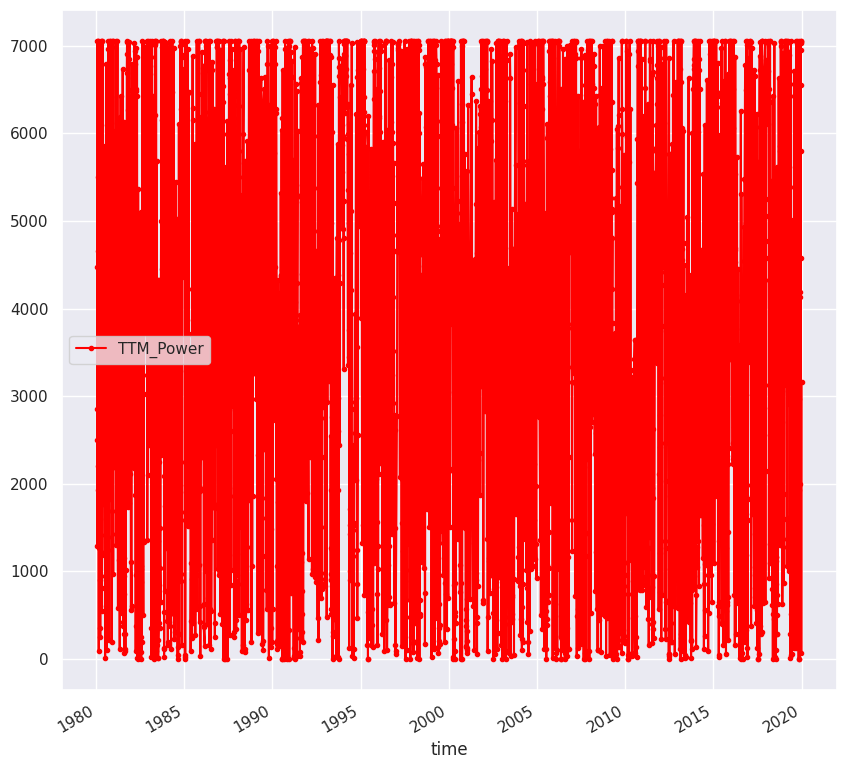

In [112]:
ttm_data2=ttm_data[['time','TTM_Power']].sample(frac=0.01)
ttm_data2.sort_values(by=['time'],inplace=True)
ttm_data2.plot('time','TTM_Power',color='red',marker='.')


TTM Plot for Just a particular year

In [113]:
# Function to plot TTM for a given year
def plot_ttm_for_year(year):
  # Filter data for the selected year
  data_year = ttm_data[ttm_data['time'].dt.year == year]

  # Create the plot
  plt.figure(figsize=(12, 6))  # Adjust figure size as needed
  plt.plot(data_year['time'], data_year['TTM_Power'], label=f'TTM Power ({year})')
  plt.xlabel('Time')
  plt.ylabel('TTM Power')
  plt.title(f'Trailing Twelve Months Power ({year})')
  plt.legend()
  plt.grid(True)
  plt.show()


Choose a year from 1980 to 2019

In [114]:
data['time'].dt.year.unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=int32)

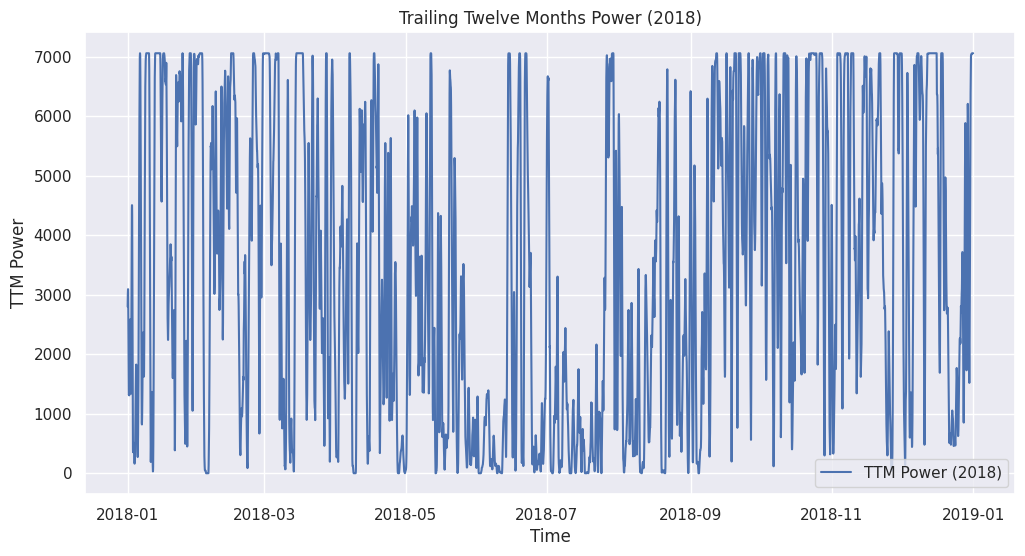

In [115]:
# Plot for 2018
plot_ttm_for_year(2018)

# Save and load Models


In [118]:
import joblib

# Save Linear Regression model
joblib.dump(model, '/content/drive/MyDrive/Windmill project/linear_regression_model.pkl')

# Save Random Forest model
joblib.dump(model2, '/content/drive/MyDrive/Windmill project/random_forest_model.pkl')

# Save Lasso model
joblib.dump(model3, '/content/drive/MyDrive/Windmill project/lasso_model.pkl')

['/content/drive/MyDrive/Windmill project/lasso_model.pkl']

In [ ]:
# Load Linear Regression model
loaded_model = joblib.load('/content/drive/MyDrive/Windmill project/linear_regression_model.pkl')

# Load Random Forest model
loaded_model2 = joblib.load('/content/drive/MyDrive/Windmill project/random_forest_model.pkl')

# Load Lasso model
loaded_model3 = joblib.load('/content/drive/MyDrive/Windmill project/lasso_model.pkl')
